In [48]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib

import plotly.express as px
from sklearn.model_selection import cross_val_score
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings("ignore")

In [49]:
data= pd.read_csv('Advertising.csv',index_col = 'Unnamed: 0')
data.head()

,TV,radio,newspaper,sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


OBSERVATION:

The data has been Imported and we can see first 5 rows in the datasheetb

In [50]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 200 entries, 1 to 200
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   radio      200 non-null    float64
 2   newspaper  200 non-null    float64
 3   sales      200 non-null    float64
dtypes: float64(4)
memory usage: 7.8 KB


OBSERVATION:

The above chart show the visualization about the dataset

    There are 4 columns TV, radio, newspaper, sales.
    
    sales column is the Target column here
    
    There are total of 200 rows amongst which none of them have null values but we can check it later 
    
    All the values are in float 
    


TV           0
radio        0
newspaper    0
sales        0
dtype: int64


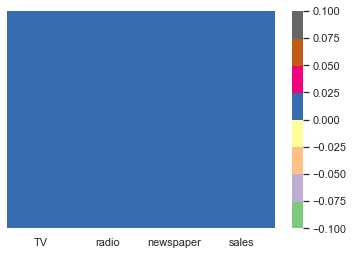

In [51]:
sns.heatmap(data.isnull(),yticklabels=False,cbar=True,cmap='Accent')

print(data.isna().sum())

OBSERVATION:

As per above observation and visualization we can see that there are no null value present

In [52]:
data.describe()

,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


OBSERVATION:

All features here are numeric and can beconsidered for analysis except Sales which seems to be the target.




  TV

    Tv feature we can see mean is as 147.04250,  it means for 200 counts it was the average amount spent.
    Std (standerd deviation ) as 85.854236 It means most of the advertisement is in the range (147.042500-85.854236) to(147.042500+85.854236) because in a continuous Random Variable most of the values can be found in the range of (mean-std) to (mean+std). 

    The min amount spent on advertisement was 0.700000 in above visualization means out of all 200 counts we have 0.700000 as amount to be the minimum for any advertisement. 

    We have 25% value(25th Percentile value) as 74.375000. It means 25% of advrtisements have spent less than 74.375000 on TV ads.

    same we have 50% value (50th percentile value) as 149.750000 It Means 50% of the advrtisements have age less than 149.750000 .

    same as 75% value (75th percentile value) we have as 218.825000 It means 75% advrtisements has spent less than 218.825000 . 

    Max value we can see as 296.400000,It Means out of all counts the Highest paid advrtisements was 296.400000.
    
    
    
    
    
    
  RADIO
    
    radio feature we can see mean is as 23.264000,  it means for 200 counts it was the average amount spent.
    
    Std (standerd deviation ) as 14.846809 It means most of the advertisement is in the range (23.264000-14.846809) to(23.264000+14.846809) because in a continuous Random Variable most of the values can be found in the range of (mean-std) to (mean+std). 

    The min amount spent on advertisement was 0.000000 in above visualization means out of all 200 counts we have 0.000000 as amount to be the minimum for any advertisement. 

    We have 25% value(25th Percentile value) as 9.975000. It means 25% of advrtisements have spent less than 9.975000 on radio ads.

    same we have 50% value (50th percentile value) as 22.900000 It Means 50% of the advrtisements have age less than 22.900000 .

    same as 75% value (75th percentile value) we have as 36.525000 It means 75% advrtisements has spent less than 36.525000 . 

    Max value we can see as 49.600000,It Means out of all counts the Highest paid advrtisements was 49.600000.





 NEWSPAPER
  
      newspaper feature we can see mean is as 30.554000, it means for 200 counts it was the average amount spent.
    
    Std (standerd deviation ) as 21.778621 It means most of the advertisement is in the range (30.554000-21.778621) to(30.554000+21.778621) because in a continuous Random Variable most of the values can be found in the range of (mean-std) to (mean+std). 

    The min amount spent on advertisement was 0.300000 in above visualization means out of all 200 counts we have 0.300000 as amount to be the minimum for any advertisement. 

    We have 25% value(25th Percentile value) as 12.750000. It means 25% of advrtisements have spent less than 12.750000 on Newspaper ads.

    same we have 50% value (50th percentile value) as 25.750000 It Means 50% of the advrtisements have age less than 25.750000 .

    same as 75% value (75th percentile value) we have as 45.100000 It means 75% advrtisements has spent less than 45.100000 . 

    Max value we can see as 114.000000,It Means out of all counts the Highest paid advrtisements was 114.000000.







In [53]:
print(data.eq('').sum())

TV           0
radio        0
newspaper    0
sales        0
dtype: int64


OBSERVATION:

There are no missing values.

Histogram of ‘sales’column

In [54]:
fig = px.histogram(data,x='sales')
fig.show()

The sales columns seems to be in great shape and in normalized curve

CORRELATIONS BETWEEN DIFFERENT FEATURES

<AxesSubplot:>

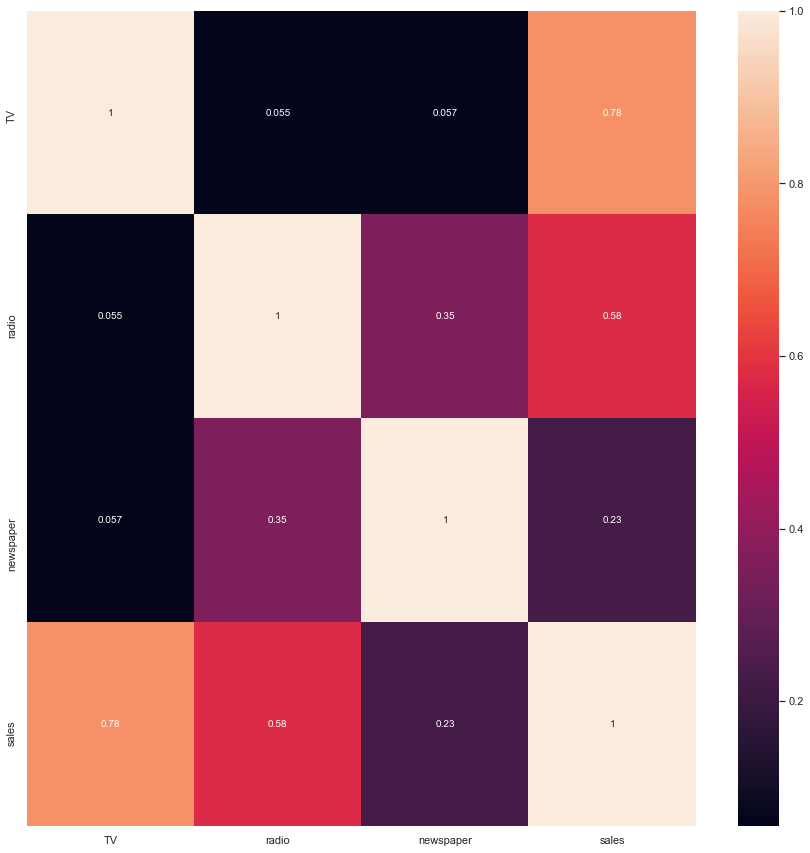

In [55]:
plt.figure(figsize=(15,15))
sns.heatmap(data.corr(),color = "k", annot=True)

OBSERVATION:

The observation shows Sales has highest correlation with TV that in 0.78

also it has lowest correlation with newspaper.

all correlations shows a positive relation between sales and other features

Relation between TV and Sales

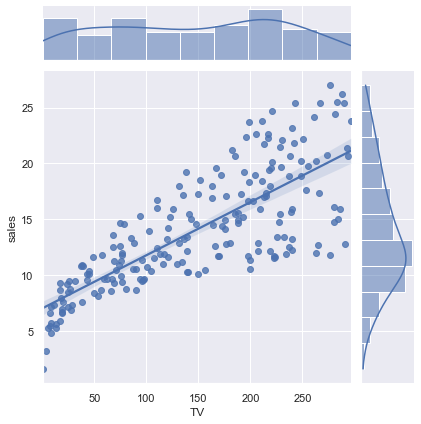

In [56]:
JG3 = sns.jointplot(x='TV',y='sales', data=data, kind='reg')

In [57]:
There seems to be a positive relation between Tv and sales 

SyntaxError: invalid syntax (<ipython-input-57-1cdc776df70e>, line 1)

Relation between radio and Sales

In [ ]:
JG3 = sns.jointplot(x='radio',y='sales', data=data, kind='reg')

The above visualization shows a positive relation between radio and sales

Relation between newspaper and Sales

In [ ]:
JG3 = sns.jointplot(x='newspaper',y='sales', data=data, kind='reg')

In [ ]:
The above visualization shows a neutral relation between sales and newspaper

In [ ]:
sns.set()
cols = ['sales','TV','radio','newspaper']
sns.pairplot(data[cols],height = 2.3)
plt.show()

The above visualization shows that TV and radio has a positive relation with sales 
newspaper is right skewed 

REMOVING OUTLIERS

In [ ]:
data.boxplot( rot = 90, figsize=(20,8))

OBSERVATION:

The above visualization shows there are outliers present in newspaper column

Removing outliers

In [ ]:
from scipy.stats import zscore
z=np.abs(zscore(data.iloc[:,0:-1]))
z

In [ ]:
data_new=data[(z<3).all(axis=1)]

In [ ]:
data.shape

In [ ]:
data_new.shape

In [ ]:
data=data_new

outliers has been removed

Checking for skewness

In [ ]:
data.skew()

OBSERVATION

There is skewness present in newspaper column considering +-0.5 as limit

In [ ]:
data['newspaper'].plot.hist()

OBSERVATION

skewness has been observed and its right skewed

In [ ]:
from sklearn.preprocessing import power_transform
from scipy.stats import skew
data['newspaper']=power_transform(data[['newspaper']], method='yeo-johnson')
data['newspaper'].plot.hist()
print(skew(data['newspaper']))

OBSERVATION 

The skewness has been removed 

In [ ]:
splitting data  for processing

In [ ]:
x=data.drop(['sales'], axis = 1)

In [ ]:
x

x has 198 rows and 3 columns

In [ ]:
y=data['sales']

In [ ]:
y

y has 198 rows and 1 column as its the target column

Scaling data

In [ ]:
from sklearn.preprocessing import StandardScaler 
x_features = x
x = StandardScaler().fit_transform(x)

x has been scaled using SatandardScaler

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=.25,)

data is been splitted for training model

In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn import linear_model
from sklearn.metrics import mean_squared_error
from math import sqrt

In [ ]:
lin=linear_model.LinearRegression()
rid=linear_model.Ridge()
tree=DecisionTreeRegressor()
forest=RandomForestRegressor()
models= [lin,rid,tree,forest]
for model in models:
    model.fit(x_train, y_train) # fit the model
    y_pred= model.predict(x_test) # then predict on the test set
    r1=r2_score(y_test,y_pred)

    rms = sqrt(mean_squared_error(y_test, y_pred))
   
    print(f"The r2 score of model {type(model).__name__}")
    print('RMSE = ',rms, ' R2 score = ',r1)
    score = cross_val_score(model, x_train, y_train, scoring='r2', cv=5)
    # with the report, we have a bigger picture, with precision and recall for each class
    
    print(f"The cross validation score of model",score)
  
    
    print("\n")

for loop is been used for testing multiple algorithms and finding best r2 score along with RMSE score and cross validation score 
RandomForestRegressor perfroms best with 96% accuracy

Hyperparameter tuning 

In [ ]:
from sklearn.model_selection import GridSearchCV

from sklearn.metrics import auc, roc_curve
param_grid = {
    'bootstrap': [True],
    'max_depth': [80, 90, 100, 110],
    'max_features': [2, 3],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 10, 12],
    'n_estimators': [100, 200, 300, 1000]
}
# Create a based model

# Instantiate the grid search model
grid_search = GridSearchCV(estimator = forest, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 2)
def evaluate(model, x_test, y_test):
    predictions = model.predict(x_test)
    errors = abs(predictions - y_test)
    mape = 100 * np.mean(errors / y_test)
    accuracy = 100 - mape
    print('Model Performance')
    print('Average Error: {:0.4f} degrees.'.format(np.mean(errors)))
    print('Accuracy = {:0.2f}%.'.format(accuracy))
    
    return accuracy
grid_search.fit(x_train, y_train)
grid_search.best_params_
{'bootstrap': True,
 'max_depth': 80,
 'max_features': 3,
 'min_samples_leaf': 5,
 'min_samples_split': 12,
 'n_estimators': 100}
best_grid = grid_search.best_estimator_
grid_accuracy = evaluate(best_grid, x_test, y_test)

best_grid
grid_accuracy

OBSERVATION

Model Performance
Average Error: 0.8026 degrees.
Accuracy = 87.48%.

In [ ]:
import joblib
joblib.dump(grid_search.best_estimator_,"adv.obj")